In [1]:
from fastai.vision import *
from bs4 import BeautifulSoup
import requests
import re
from urllib.request import urlopen
import urllib.request
import os
import json
import pandas as pd
import csv
import math

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import torch
from pathlib import Path
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models
import random
import cv2
import matplotlib.pyplot as plt

# get the url 

In [600]:
# create a folder called "Pictures" at the current directory

In [651]:
def get_soup(url,header):
    return BeautifulSoup(urlopen(urllib.request.Request(url,headers=header)),'html.parser')

query = input("query image:")# you can change the query for the image  here
image_type="ActiOn"
query= query.split()
query='+'.join(query)
url="https://www.google.co.in/search?q="+query+"&source=lnms&tbm=isch"

DIR="Pictures"

header={'User-Agent':"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/43.0.2357.134 Safari/537.36"
}
soup = get_soup(url,header)

ActualImages=[]# contains the link for Large original images, type of  image
for a in soup.find_all("div",{"class":"rg_meta"}):
    link , Type =json.loads(a.text)["ou"]  ,json.loads(a.text)["ity"]
    ActualImages.append(link)

print("there are total", len(ActualImages),"images")


file_name = query.replace("+","_")
if not os.path.exists(DIR):
            os.mkdir(DIR)

# with open(DIR+'/'+file_name+'.csv', 'w') as writeFile:
#     writer = csv.writer(writeFile, dialect='excel')
#     writer.writerow(ActualImages)

df = pd.DataFrame({'data':ActualImages})
df.to_csv(DIR+'/'+file_name+'.csv', header=False)

print("done")

query image:tie
there are total 100 images
done


# create folders and download images

In [6]:
PATH = Path("")

In [7]:
# create folders
def create_folder(obj):
    folder = obj
    file = obj+'.csv'
    dest = PATH/folder
    dest.mkdir(parents=True, exist_ok=True)

In [14]:
classes = ['car','dress','hairstyle','sneakers','tie']
folders = ['car','dress','hairstyle','sneakers','tie']
files = ['car.csv','dress.csv','hairstyle.csv','sneakers.csv','tie.csv']

In [608]:
for item in classes:
    create_folder(item)

# Move the csv to the corresponding folder

#### in terminal (for each categrory)  
#### (because i need each csv doesn't have the first column which is integers from 1 to n)
(MSDS694) appledeMacBook-Pro-4:AorB Reagan$ cd Pictures/
(MSDS694) appledeMacBook-Pro-4:Pictures Reagan$ chmod +x ../del_first_col.sh 
(MSDS694) appledeMacBook-Pro-4:Pictures Reagan$ ../del_first_col.sh

## Download pictures

In [609]:
for i in range(len(classes)):
    path = Path('')
    folder = folders[i]
    file = files[i]
    dest = path/folder
    download_images(path/folder/file, dest, max_pics=20, max_workers=0)

Error "https://media.wired.com/photos/59bafdf204afdc5248726f5c/master/w_2400 No connection adapters were found for '"https://media.wired.com/photos/59bafdf204afdc5248726f5c/master/w_2400'
Error "https://www.popsci.com/sites/popsci.com/files/styles/1000_1x_/public/images/2018/03/senna.jpg?itok=eYNPMGjA&fc=50 No connection adapters were found for '"https://www.popsci.com/sites/popsci.com/files/styles/1000_1x_/public/images/2018/03/senna.jpg?itok=eYNPMGjA&fc=50'
Error "https://img.etimg.com/thumb/msid-61740239 No connection adapters were found for '"https://img.etimg.com/thumb/msid-61740239'
Error "https://images.express.com/is/image/expressfashion/0094_07852622_0058?cache=on&wid=361&fmt=jpeg&qlt=75 No connection adapters were found for '"https://images.express.com/is/image/expressfashion/0094_07852622_0058?cache=on&wid=361&fmt=jpeg&qlt=75'
Error "https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/suede-sneakers-1533135336.jpg?crop=1xw:1xh;center No connection adapters were foun

In [313]:
# folder = 'car'
# file = 'car.csv'
# path = Path('')
# dest = path/folder
# dest.mkdir(parents=True, exist_ok=True)

In [610]:
path.ls()

[PosixPath('.DS_Store'),
 PosixPath('.ipynb_checkpoints'),
 PosixPath('car'),
 PosixPath('dress'),
 PosixPath('hairstyle'),
 PosixPath('Mar30th.ipynb'),
 PosixPath('Pictures'),
 PosixPath('search_terms.py'),
 PosixPath('sneakers'),
 PosixPath('tie')]

In [585]:
# rename image filenames

In [611]:
def rename_image(obj):
    for filename in os.listdir(PATH/obj): 
        path = PATH/obj
        dst = os.path.join(path,obj + filename)
        src = os.path.join(path,filename)

        # rename() function will 
        # rename all the files 
        os.rename(src, dst) 

In [612]:
for item in classes:
    rename_image(item)

# read image 

In [27]:
def read_image(path):
    im = cv2.imread(str(path))
    return cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

In [28]:
# try read one image 

(516, 723, 3)

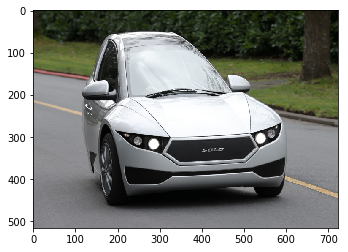

In [29]:
path = PATH/"car/car00000011.jpg"
im = read_image(path)
plt.imshow(im)
im.shape

In [616]:
im = cv2.imread(str(path))
im.shape

(516, 723, 3)

# Resize images

In [8]:
import math
def random_crop(x, target_r, target_c):
    """ Returns a random crop"""
    r,c,*_ = x.shape
    rand_r = random.uniform(0, 1)
    rand_c = random.uniform(0, 1)
    start_r = np.floor(rand_r*(r - target_r)).astype(int)
    start_c = np.floor(rand_c*(c - target_c)).astype(int)
    return crop(x, start_r, start_c, target_r, target_c)

def rotate_cv(im, deg, mode=cv2.BORDER_REFLECT, interpolation=cv2.INTER_AREA):
    """ Rotates an image by deg degrees"""
    r,c,*_ = im.shape
    M = cv2.getRotationMatrix2D((c/2,r/2),deg,1)
    return cv2.warpAffine(im,M,(c,r), borderMode=mode, flags=cv2.WARP_FILL_OUTLIERS+interpolation)

In [9]:
# resize images
def crop(im, r, c, target_r, target_c): return im[r:r+target_r, c:c+target_c]

def center_crop(im, min_sz=None):
    """ Returns a center crop of an image"""
    r,c,*_ = im.shape
    if min_sz is None: min_sz = min(r,c)
    start_r = math.ceil((r-min_sz)/2)
    start_c = math.ceil((c-min_sz)/2)
    return crop(im, start_r, start_c, min_sz, min_sz)

def resize_crop_image(path, sz=(303, 227)):
    im = read_image(path)
    im = center_crop(im)
    return cv2.resize(im, sz)

def resize_all_images(resize_path, org_path):
#     files = [x for x in list(org_path.iterdir()) if x.suffix == ".jpg"]
    files = [x for x in list(org_path.iterdir()) if x.suffix != ".csv"]
    for f in files:
        try:
            f_name = f.parts[-1]    
            new_path = resize_path/f_name

            im = resize_crop_image(f)
            cv2.imwrite(str(new_path), cv2.cvtColor(im, cv2.COLOR_RGB2BGR))
        except:
            pass

## create folders for resized images 

In [619]:
def create_resized_folder(obj):
    folder = "resized_"+ obj
    dest = PATH/folder
    dest.mkdir(parents=True, exist_ok=True)

In [620]:
# empty folders
for item in classes:
    create_resized_folder(item)

In [621]:
# resize images from original folder to new folder
# resize_all_images(PATH/"train_303_227", PATH/"train")
resize_all_images(PATH/"resized_car", PATH/"car")
resize_all_images(PATH/"resized_dress", PATH/"dress")
resize_all_images(PATH/"resized_hairstyle", PATH/"hairstyle")
resize_all_images(PATH/"resized_sneakers", PATH/"sneakers")
resize_all_images(PATH/"resized_tie", PATH/"tie")

# Create labels (y_train)

In [15]:
import os
df_num = pd.DataFrame()
for item in classes:
    folder = "resized_"+item
    temp = pd.DataFrame({'class': [item], 'number': [len(os.listdir(PATH/folder))]})
    df_num = pd.concat([df_num, temp])
# os.listdir(PATH/"car")

In [16]:
df_num

,class,number
0,car,17
0,dress,19
0,hairstyle,19
0,sneakers,17
0,tie,20


In [624]:
# for example
df_num[df_num["class"] == 'dress'].number[0]

19

In [18]:
car = [1,0,0,0,0]
dress = [0,1,0,0,0]
hairstyle = [0,0,1,0,0]
sneakers = [0,0,0,1,0]
tie = [0,0,0,0,1]

In [19]:
car = pd.DataFrame([car])
car = car.reindex(car.index.repeat(df_num[df_num["class"] == 'car'].number[0]))
dress = pd.DataFrame([dress])
dress = dress.reindex(dress.index.repeat(df_num[df_num["class"] == 'dress'].number[0]))
hairstyle = pd.DataFrame([hairstyle])
hairstyle = hairstyle.reindex(hairstyle.index.repeat(df_num[df_num["class"] == 'hairstyle'].number[0]))
sneakers = pd.DataFrame([sneakers])
sneakers = sneakers.reindex(sneakers.index.repeat(df_num[df_num["class"] == 'sneakers'].number[0]))
tie = pd.DataFrame([tie])
tie = tie.reindex(tie.index.repeat(df_num[df_num["class"] == 'tie'].number[0]))

In [20]:
labels_pd = car.append(dress).append(hairstyle).append(sneakers).append(tie)

In [21]:
labels = np.array(labels_pd)

In [22]:
print(len(labels))
labels

92


array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]])

# modeling

In [10]:
def normalize(im):
    """Normalizes images with Imagenet stats."""
    imagenet_stats = np.array([[0.485, 0.456, 0.406], [0.229, 0.224, 0.225]])
    return (im - imagenet_stats[0])/imagenet_stats[1]
def apply_transforms(x, sz=(303, 227), zoom=1.05):
    """ Applies a random crop, rotation"""
    sz1 = int(zoom*sz[0])
    sz2 = int(zoom*sz[1])
    x = cv2.resize(x, (sz1, sz2))
    x = rotate_cv(x, np.random.uniform(-10,10))
    x = random_crop(x, sz[1], sz[0])
    if np.random.rand() >= .5:
                x = np.fliplr(x).copy()
    return x

In [11]:
class imageDataset(Dataset):
    def __init__(self, files_path, labels, transform=False):
        self.num_files = len(labels)
        self.files_path = files_path
        self.labels = labels
        self.transform = transform
        
    def __len__(self):
        return self.num_files
    
    def __getitem__(self, index):
#         row = self.labels.iloc[index,:]
#         y = row["invasive"]
        y = self.labels[index]
        file_name =os.listdir(self.files_path)[index]
        path = self.files_path/str(file_name)
        x = read_image(path)
        if self.transform:
            x = apply_transforms(x)
        #else:
        #    x = cv2.resize(x, (303, 227))
        x = normalize(x)
        x = np.rollaxis(x, 2)
        return x, y

In [632]:
# l = os.listdir(PATH/"resized_train")
# li=[x.split('.')[0] for x in l]

## create a folder to put in all the images (in order)

#### in terminal
(MSDS694) appledeMacBook-Pro-4:AorB Reagan$ chmod +x five.sh
(MSDS694) appledeMacBook-Pro-4:AorB Reagan$ ./five.sh

## use imageDataset() 

In [156]:
train_ds = imageDataset(PATH/"five", labels=labels, transform=True)

In [157]:
train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)  # WHY batch_size = 64?


In [158]:
train_loader

In [159]:
x, y = next(iter(train_loader))  # WHY this step?

## the model

In [160]:
resnet = models.resnet34(pretrained=True)

In [161]:
layers = list(resnet.children())
print(len(layers))
layers[-2:]

10


[AdaptiveAvgPool2d(output_size=(1, 1)),
 Linear(in_features=512, out_features=1000, bias=True)]

In [162]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        resnet = models.resnet34(pretrained=True)
        # freezing parameters
        for param in resnet.parameters():
            param.requires_grad = False
        # convolutional layers of resnet34
        layers = list(resnet.children())[:8]
        self.top_model = nn.Sequential(*layers)
        self.bn1 = nn.BatchNorm1d(512)
        self.bn2 = nn.BatchNorm1d(512)
        self.fc1 = nn.Linear(512, 512)
        self.fc2 = nn.Linear(512, 5)
    
    def forward(self, x):
        x = F.relu(self.top_model(x))
        x = nn.AdaptiveAvgPool2d((1,1))(x)
        x = x.view(x.shape[0], -1) # flattening 
        #x = nn.Dropout(0.2)(x)
        x = self.bn1(x)
        x = F.relu(self.fc1(x))
        #x = nn.Dropout(0.2)(x)
        x = self.bn2(x)
        x = self.fc2(x)
        return x

In [163]:
model = Net()

In [164]:
x = x.float()
y = y.float()
y.shape

torch.Size([64, 5])

In [165]:
# ???
x_features = model.top_model(x)
x_features.shape

torch.Size([64, 512, 8, 10])

In [166]:
# ???
# AdaptiveAvgPool2d would do a similar job if the input is [64, 512, 10, 20]
# that is why this model will fit any input size
x_features_ave = nn.AdaptiveAvgPool2d((1,1))(x_features)
x_features_ave.shape

torch.Size([64, 512, 1, 1])

In [167]:
# ???
x_features_flatten = x_features_ave.view(x_features_ave.shape[0], -1)
x_features_flatten.shape

torch.Size([64, 512])

In [168]:
y_hat = model(x)
y_hat.shape

torch.Size([64, 5])

## loss

In [182]:
F.cross_entropy(y_hat,torch.max(y, 1)[1]).item()

1.6944700479507446

In [170]:
y_hat

tensor([[ 8.5222e-02, -1.4562e-01, -9.5977e-02, -4.2511e-01, -4.8455e-01],
        [ 3.4302e-01, -4.6472e-01,  2.7271e-01, -7.5242e-01, -9.8703e-02],
        [-1.4719e-01, -3.7518e-01, -1.0429e-01, -4.7576e-01,  5.7924e-01],
        [ 7.3049e-01, -7.4533e-02, -2.3702e-01, -3.3277e-02,  6.5539e-02],
        [-3.8939e-01, -2.8855e-01, -4.9619e-01, -1.1802e-02,  4.2860e-01],
        [ 1.5462e-01, -4.8779e-02, -2.2971e-01, -4.2354e-01, -7.8867e-02],
        [-5.9075e-01, -5.7986e-01, -2.6741e-01, -3.4560e-01,  4.5336e-01],
        [ 2.6676e-01,  2.7627e-01, -2.0437e-01,  1.5533e-01, -5.2942e-01],
        [ 1.0172e+00,  2.2730e-01, -6.1298e-01, -2.2923e-01, -1.1478e-01],
        [-3.5728e-01,  3.6211e-01,  1.8371e-01,  3.6600e-01, -4.9738e-01],
        [ 1.8375e-01,  1.9257e-01, -3.2054e-01, -3.4446e-01,  1.2053e-01],
        [ 1.9565e-01,  2.3386e-01,  6.3709e-01, -4.3831e-01,  6.0449e-02],
        [-2.6929e-01,  2.9280e-01, -1.2347e-02, -2.8823e-01,  2.7754e-01],
        [ 3.9672e-02,  2.

# learning rate finder

In [171]:
def get_optimizer(model, lr = 0.01, wd = 0.0):
    parameters = filter(lambda p: p.requires_grad, model.parameters())
    optim = torch.optim.Adam(parameters, lr=lr, weight_decay=wd)
    return optim

In [186]:
def save_model(m, p): torch.save(m.state_dict(), p)
    
def load_model(m, p): m.load_state_dict(torch.load(p))

def LR_range_finder(model, train_dl, lr_low=1e-5, lr_high=1, epochs=4):
    losses = []
    p = PATH/"mode_tmp.pth"
    save_model(model, str(p))
    iterations = epochs * len(train_dl)
    delta = (lr_high - lr_low)/iterations
    lrs = [lr_low + i*delta for i in range(iterations)]
    model.train()
    ind = 0
    for i in range(epochs):
        for x,y in train_dl:
            optim = get_optimizer(model, lr=lrs[ind])
            x = x.float()
            y = y.float()
            out = model(x)
            #loss = F.binary_cross_entropy_with_logits(out, y)
            loss = F.cross_entropy(out,torch.max(y, 1)[1])
            optim.zero_grad()
            loss.backward()
            optim.step()
            losses.append(loss.item())
            ind +=1
            
    load_model(model, str(p))
    return lrs, losses

In [187]:
model = Net()
lrs, losses = LR_range_finder(model, train_loader, lr_low=1e-6, lr_high=0.1)

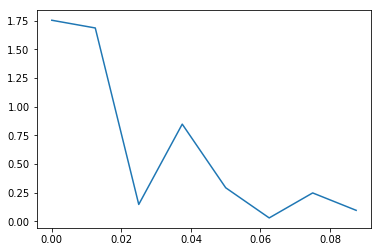

In [188]:
plt.plot(lrs[:20], losses[:20])
plt.show()